# Dax Analysis Demo

## Intro
The purpose of this demo is to introduce you to a few tools we've written to analyze Dax files.  

## loading the toolboxes
First we need to tell i-python where our toolboxes are so they can be imported.  We also want to import a few core packages from python such as "numpy" and "scipy" for scientific computing.  These we don't have tell the computer where they are, we can just run `import numpy` or so we don't have to keep writing "numpy", we can write `import numpy as np`

In [2]:
%run DemoStartup.py

C:\Users\Alistair\Desktop\code\tutorials
Added to path: C:\Users\Alistair\Desktop\code\python-functions\python-functions-library
daoSTORM path=C:\Users\Alistair\Desktop\code\python-functions\python-functions-library\storm-analysis\3d_daostorm\mufit_analysis.py


In [3]:
data_folder=r'E:\Mirae-Simon\2017-01-12_Beads'
dax_files=glob.glob(data_folder+os.sep+'*.dax')  # return a list of all files.  Could also seed this with 'beads*.dax'
print dax_files[0]

E:\Mirae-Simon\2017-01-12_Beads\beads_0003.dax


In [4]:
dax=saa.readDax(dax_files[0])
print 
dax.shape

(120L, 612L, 612L)

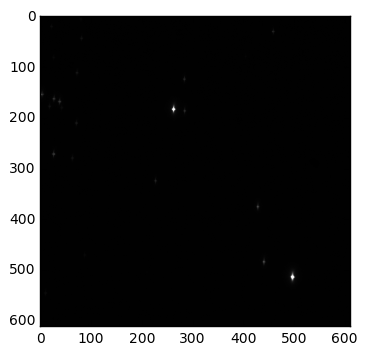

In [6]:
%matplotlib inline
im=np.max(dax,0) # display a max-projection across all frames of the image 
frame = 10
plt.imshow(dax[frame],cmap=cm.Greys_r)
plt.show()

In [7]:
#help(saa.fitFrame)
parms=saa.getParms()
parms.start_frame=10
parms.max_frame=11
parms.threshold=900.
parms.iterations=1
#parms=saa.loadParms(xml_file)
bin_file=dax_files[0].replace('.dax','_mlist.bin')
saa.fitFrame(dax_files[0],bin_file,parms)
mlist=saa.readMasterMoleculeList(bin_file)

C:\Users\Alistair\Desktop\code\python-functions\python-functions-library\storm-analysis\sa_library/ia_utilities.dll
C:\Users\Alistair\Desktop\code\python-functions\python-functions-library\storm-analysis\sa_library/multi_fit.dll
C:\Users\Alistair\Desktop\code\python-functions\python-functions-library\storm-analysis\sa_library/matched_filter.dll
C:\Users\Alistair\Desktop\code\python-functions\python-functions-library\storm-analysis\simulator/draw_gaussians.dll
If necessary, run in terminal: python -m pip install dicttoxml
Peak finding
Frame: 10 19 19

Added 19

Tracking

Analysis complete
Version: M425
Frames: 1
Status: 6
Molecules: 19



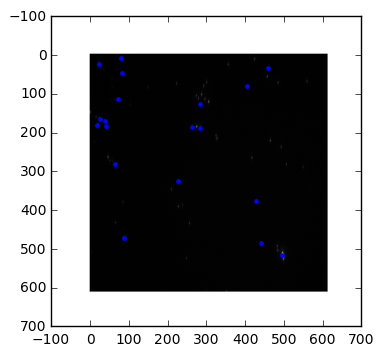

In [8]:
im = dax[1]
plt.imshow(im,cmap=cm.Greys_r)
plt.plot(mlist['y']-1,mlist['x']-1,'.')
plt.show()